In [22]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [23]:
# File to Load (Remember to Change These)
wine_red_data_to_load = Path("Resources/wine+quality/winequality-red.csv")
wine_white_data_to_load = Path("Resources/wine+quality/winequality-white.csv")

In [24]:
# Read Wine_Red_Data and Wine_Red_Data File and store into Pandas DataFrames
wine_red_data = pd.read_csv(wine_red_data_to_load, delimiter=';')
wine_white_data = pd.read_csv(wine_white_data_to_load, delimiter=';')

In [25]:
wine_red_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
wine_red_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [27]:
wine_red_data["color"] = 'red'

In [28]:
wine_red_data["color"]

0       red
1       red
2       red
3       red
4       red
       ... 
1594    red
1595    red
1596    red
1597    red
1598    red
Name: color, Length: 1599, dtype: object

In [29]:
wine_white_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [30]:
wine_white_data["color"] = 'white'

In [31]:
wine_white_data["color"]

0       white
1       white
2       white
3       white
4       white
        ...  
4893    white
4894    white
4895    white
4896    white
4897    white
Name: color, Length: 4898, dtype: object

In [32]:
wine_complete = pd.concat([wine_red_data, wine_white_data])

In [33]:
wine_complete.shape

(6497, 13)

In [34]:
wine_complete.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
476,7.4,0.28,0.36,1.10,0.028,42.0,105.0,0.98930,2.99,0.39,12.4,7,white
2547,6.2,0.33,0.14,4.80,0.052,27.0,128.0,0.99475,3.21,0.48,9.4,5,white
815,6.2,0.30,0.17,2.80,0.040,24.0,125.0,0.99390,3.01,0.46,9.0,5,white
3863,6.5,0.27,0.19,6.60,0.045,98.0,175.0,0.99364,3.16,0.34,10.1,6,white
226,8.9,0.59,0.50,2.00,0.337,27.0,81.0,0.99640,3.04,1.61,9.5,6,red
2838,6.9,0.15,0.29,2.30,0.033,14.0,82.0,0.99132,3.10,0.58,11.2,7,white
837,7.3,0.25,0.36,2.10,0.034,30.0,177.0,0.99085,3.25,0.40,11.9,8,white
1263,9.6,0.29,0.46,1.45,0.039,77.5,223.0,0.99440,2.92,0.46,9.5,6,white
854,9.3,0.36,0.39,1.50,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,6,red
2516,7.1,0.32,0.29,4.00,0.038,33.0,170.0,0.99463,3.27,0.64,10.2,6,white


In [35]:
cleaned_data=pd.get_dummies(wine_complete)
cleaned_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_red,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,True,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,True,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,True,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,True,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,False,True
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,False,True
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,False,True
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,False,True


In [36]:
wine_complete.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [37]:
# Convert boolean columns to 1 and 0
bool_columns = ['color_red', 'color_white']
cleaned_data[bool_columns] = cleaned_data[bool_columns].astype(int)

In [38]:
cleaned_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_red,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1


In [39]:
wine_complete

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [40]:
# Encode the 'color' column using LabelEncoder
label_encoder = LabelEncoder()
wine_complete['color'] = label_encoder.fit_transform(wine_complete['color'])

wine_complete

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


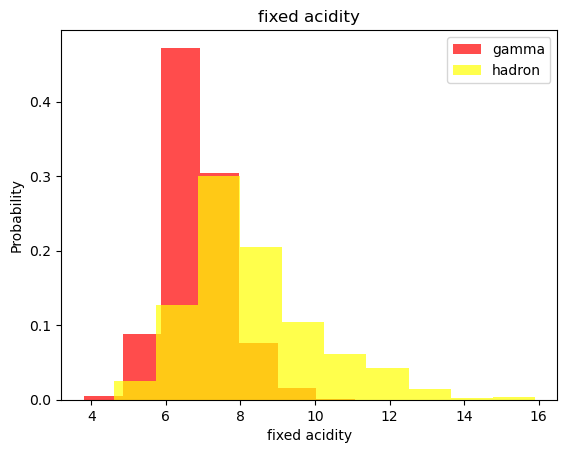

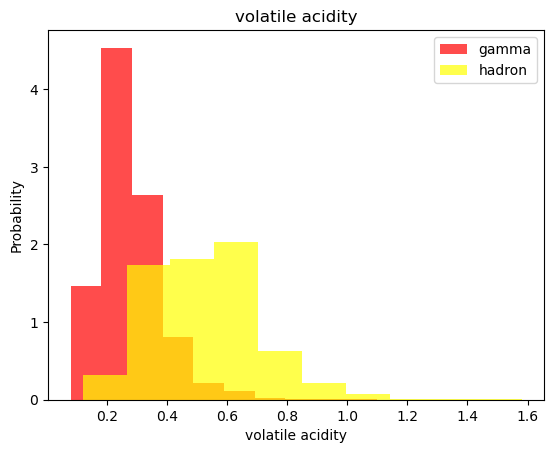

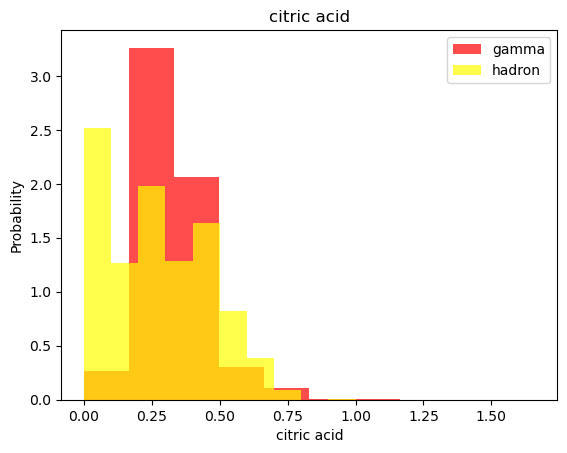

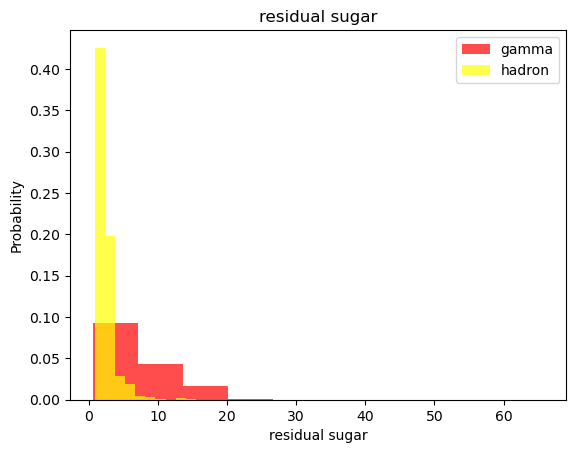

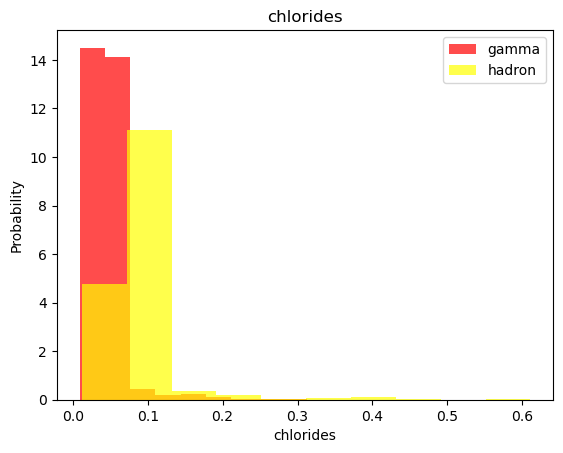

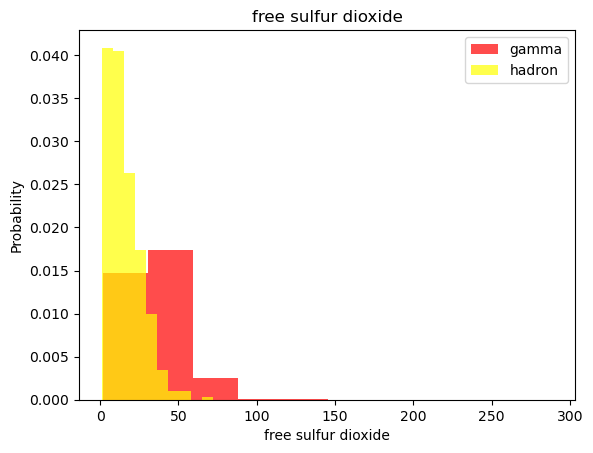

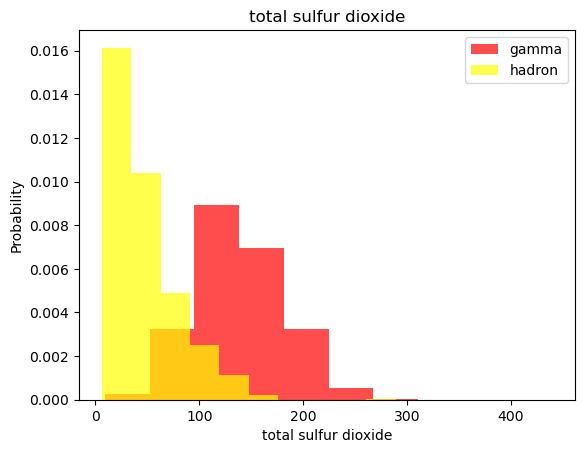

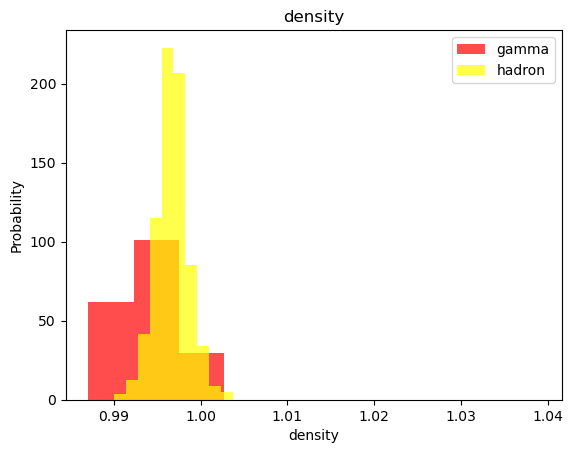

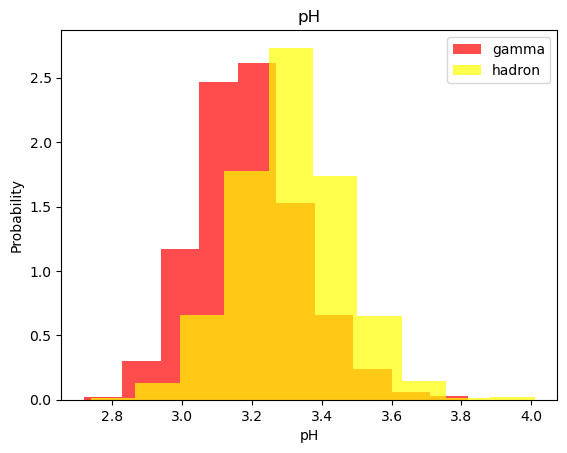

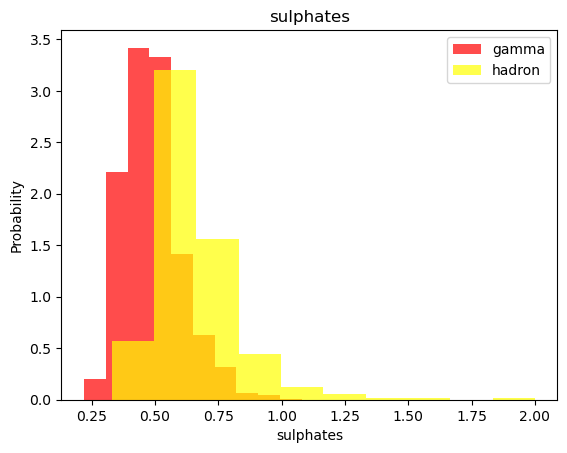

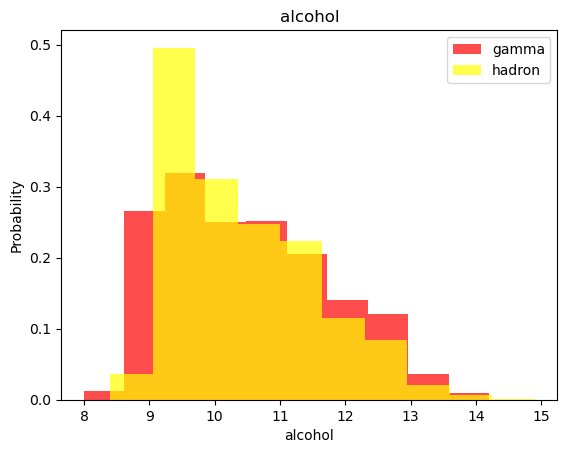

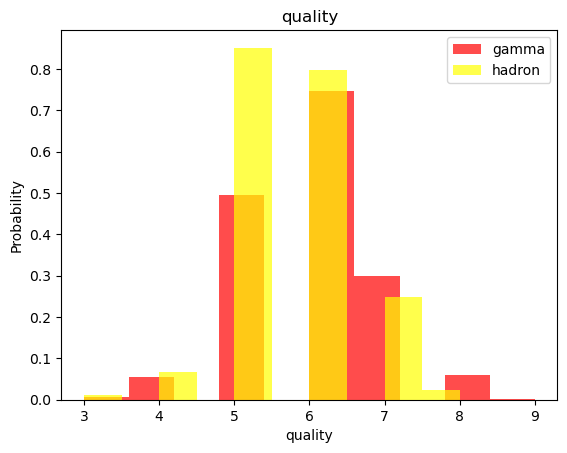

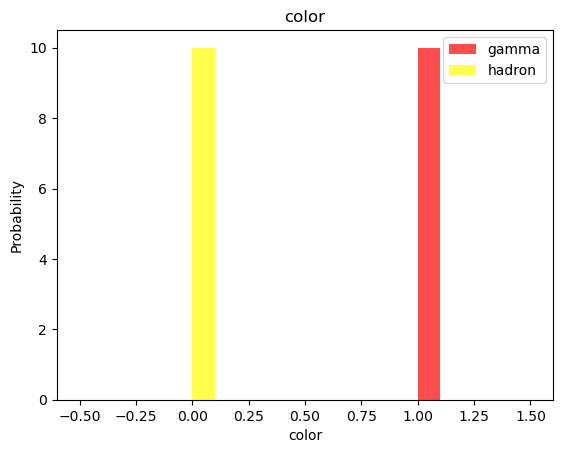

In [46]:
for label in wine_complete[:-1]:
    plt.hist(wine_complete[wine_complete["color"]==1][label], color='red', label='gamma',alpha=0.7, density=True)
    plt.hist(wine_complete[wine_complete["color"]==0][label], color='yellow', label='hadron',alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

## Train, Validation, Test datasets

In [47]:
train, valid, test = np.split(wine_complete.sample(frac=1), [int(0.6*len(wine_complete)), int(0.8*len(wine_complete))])

In [48]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler=StandardScaler()
    X= scaler.fit_transform(X)

    if oversample:
        ros=RandomOverSampler()
        X,y=ros.fit_resample(X,y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [49]:
train, X_train, y_train= scale_dataset(train, oversample=True)
valid, X_valid, y_valid= scale_dataset(valid, oversample=False)
test, X_test, y_test= scale_dataset(test, oversample=False)


## KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [51]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
y_pred=knn_model.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       334
           1       0.99      0.99      0.99       966

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



## Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
nb_model=GaussianNB()
nb_model=nb_model.fit(X_train,y_train)

In [56]:
y_pred=nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       334
           1       0.99      0.96      0.98       966

    accuracy                           0.97      1300
   macro avg       0.95      0.97      0.96      1300
weighted avg       0.97      0.97      0.97      1300



## Logic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(X_train,y_train)

In [59]:
y_pred=lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       334
           1       1.00      0.99      0.99       966

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



## SVM

In [60]:
from sklearn.svm import SVC

In [61]:
svm_model=SVC()
svm_model=svm_model.fit(X_train,y_train)

In [62]:
y_pred=svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       334
           1       0.99      1.00      0.99       966

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



## Neural Net

In [63]:
import tensorflow as tf

ValueError: in user code:

    File "/Users/micahgalbadores/anaconda3/envs/pythondataucb/lib/python3.11/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/micahgalbadores/anaconda3/envs/pythondataucb/lib/python3.11/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/micahgalbadores/anaconda3/envs/pythondataucb/lib/python3.11/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/micahgalbadores/anaconda3/envs/pythondataucb/lib/python3.11/site-packages/keras/src/engine/training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "/Users/micahgalbadores/anaconda3/envs/pythondataucb/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/micahgalbadores/anaconda3/envs/pythondataucb/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 12)
